In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numba

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [8]:
df = pd.read_csv(r"C:\Users\ihars\Downloads\ps.csv")
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [12]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

<AxesSubplot:>

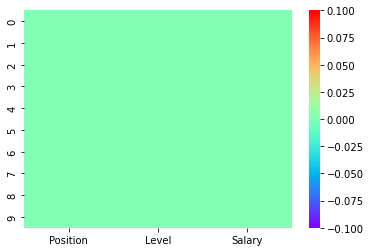

In [11]:
sns.heatmap(df.isnull(), yticklabels=True, cmap="rainbow")

### Do we need encoding here? 
- No, beacuse level is associated

In [13]:
X = df.iloc[:, 1:2]
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [14]:
Y = df.iloc[:,2:]
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


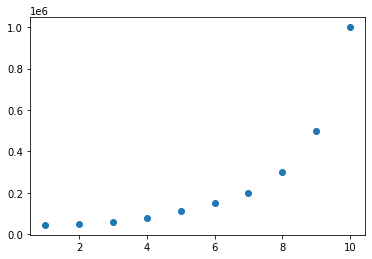

In [17]:
plt.scatter(X,Y)

### Ready for Split

In [29]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, 
                                                  test_size=0.2, random_state=42)


### Linear Regression

In [19]:
LR = LinearRegression()

In [30]:
LR.fit(X_train, Y_train)
y_pred = LR.predict(X_test)
score = r2_score(Y_test, y_pred)
score

0.8451346684575974

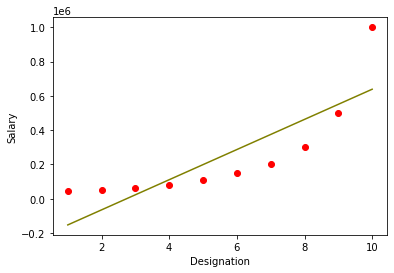

In [31]:
plt.scatter(X, Y, c='red')
plt.plot(X, LR.predict(X), c='olive')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()

In [32]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [35]:
level = float(input())
LR.predict([[level]])

8


array([[462844.82758621]])

## Polynomial Regression

### Degree 2

In [75]:
df = pd.read_csv(r"C:\Users\ihars\Downloads\ps.csv")
X = df.iloc[:, 1:2]
Y = df.iloc[:, 2:]

In [76]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [77]:
Y

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000
5,150000
6,200000
7,300000
8,500000
9,1000000


In [78]:
PF = PolynomialFeatures(degree=2)
X = PF.fit_transform(X)

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                         test_size=0.3, random_state=42)

In [80]:
PR2 = LinearRegression()
PR2.fit(X_train, Y_train)
y_pred = PR2.predict(X_test)
score = r2_score(Y_test, y_pred)
score

0.7896604512664254

### Degree 5

In [81]:
df = pd.read_csv(r"C:\Users\ihars\Downloads\ps.csv")
X = df.iloc[:, 1:2]
Y = df.iloc[:, 2:]

In [87]:
X.shape

(10, 6)

In [88]:
Y.shape

(10, 1)

In [82]:
PF = PolynomialFeatures(degree=5)
X = PF.fit_transform(X)

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                         test_size=0.3, random_state=42)

In [84]:
PR5 = LinearRegression()
PR5.fit(X_train, Y_train)
y_pred = PR5.predict(X_test)
score = r2_score(Y_test, y_pred)
score

0.9949078503296994

In [89]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [100]:
level = float(input())
PR5.predict(PF.fit_transform([[level]]))

9


array([[523466.916139]])

### Plot the curve

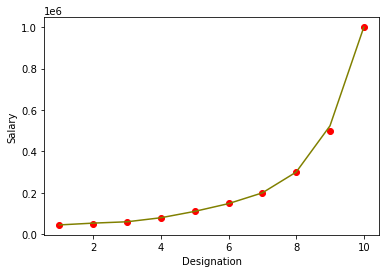

In [93]:
X = df.iloc[:, 1:2]
Y = df.iloc[:, 2:]
plt.scatter(X, Y, c='red')
plt.plot(X, PR5.predict(PF.fit_transform(X)), c='olive')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.show()